In [1]:
# For data handling
import pandas as pd

# For splitting dataset
from sklearn.model_selection import train_test_split

# For converting text to numbers
from sklearn.feature_extraction.text import TfidfVectorizer

# For Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

# For Logistic Regression
from sklearn.linear_model import LogisticRegression

# For evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For saving/loading models
import joblib

# For text cleaning
import re


In [3]:
import pandas as pd

# Try loading using relative path
df = pd.read_csv('data/IMDB Dataset.csv')

# If that doesn't work, use full path (example)
# df = pd.read_csv(r'C:\Users\Srija\Documents\sentiment_analysis\data\IMDB Dataset.csv')

# Display first 5 rows
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df['sentiment'].value_counts()
#how many positive how many negatives


sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [15]:
!pip install nltk


  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached regex-2025.9.18-cp313-cp313-win_amd64.whl.metadata (41 kB)
Using cached nltk-3.9.2-py3-none-any.whl (1.5 MB)
Using cached regex-2025.9.18-cp313-cp313-win_amd64.whl (275 kB)

   ---------------------------------------- 0/2 [regex]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ----------

In [16]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\64pul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [17]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = re.sub('<.*?>', '', text)  # remove HTML tags
    text = re.sub('[^a-zA-Z]', ' ', text)  # remove numbers/punctuation
    text = text.lower()
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['review'] = df['review'].apply(clean_text)


In [23]:
#spliting dataset
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

#check 
print(f"training samples: {len(X_train)}, testing samples: {len(X_test)}")
#80 percent data is for training and the rest is for testing


training samples: 40000, testing samples: 10000


In [26]:
tfidf = TfidfVectorizer(max_features=12000, ngram_range=(1, 3))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [28]:
#crucial part
#training the naive bayes model

nb_model = MultinomialNB()
#model initialised

nb_model.fit(X_train_tfidf, y_train)

y_pred_nb = nb_model.predict(X_test_tfidf)
#predicting the output using the x_test_vec data 

print("naive bayes accuracy:" , accuracy_score(y_test, y_pred_nb))
#accuracy


print("print the confusion matrix:\n", confusion_matrix(y_test, y_pred_nb))
#confusion matrix

print("classification_report:\n", classification_report(y_test,y_pred_nb))
#classification report

naive bayes accuracy: 0.8653
print the confusion matrix:
 [[4210  751]
 [ 596 4443]]
classification_report:
               precision    recall  f1-score   support

    negative       0.88      0.85      0.86      4961
    positive       0.86      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [29]:
#training the logicstic model
lr_model = LogisticRegression(max_iter=1000)
#modle initialised

#training the model
lr_model.fit(X_train_tfidf, y_train)

#predicting
y_pred_lr = lr_model.predict(X_test_tfidf)

#evaluate
print("logistic model report for accuracy:", accuracy_score(y_test,y_pred_lr))

logistic model report for accuracy: 0.8921


In [30]:
joblib.dump(nb_model, 'nb_model.pkl')
joblib.dump(lr_model, 'lr_model.pkl')
joblib.dump(tfidf, 'tfidf.pkl')

['tfidf.pkl']

In [31]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

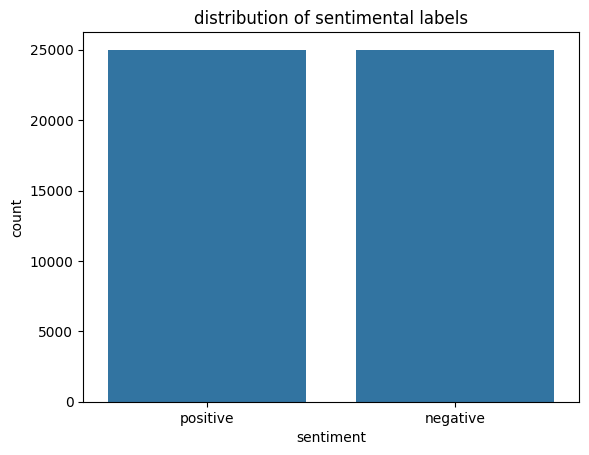

In [ ]:
#class distribution plot
sns.countplot(x='sentiment', data=df)
plt.title('distribution of sentimental labels')
plt.show()

#shows how many positive and negative reviews are in the dataset

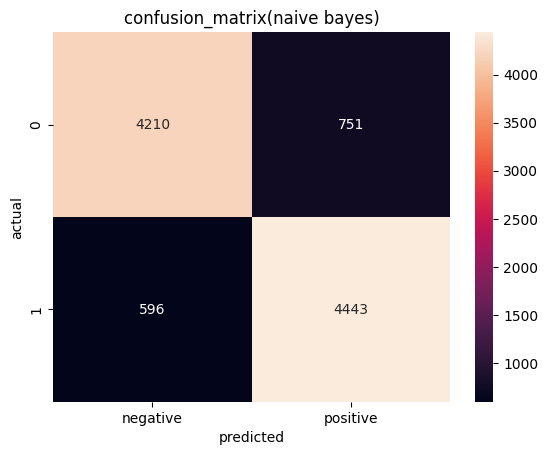

In [34]:
#comfusion matrix heatmap

#compute confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)

#plotting the heatmap

sns.heatmap(cm, annot=True, fmt='d', xticklabels=['negative', 'positive'])
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion_matrix(naive bayes)")
plt.show()


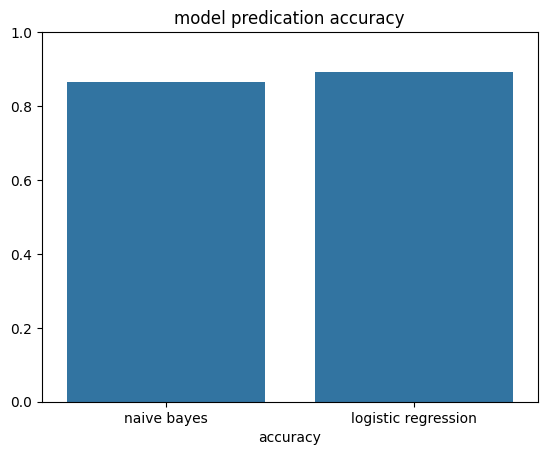

In [35]:
#accuracy comparison bar chart
accuracy_value = [accuracy_score(y_pred_nb, y_test),accuracy_score(y_pred_lr, y_test)]
models = ['naive bayes', 'logistic regression']

sns.barplot(x=models, y=accuracy_value)
plt.xlabel("accuracy")
plt.title("model predication accuracy")
plt.ylim(0,1)
plt.show()

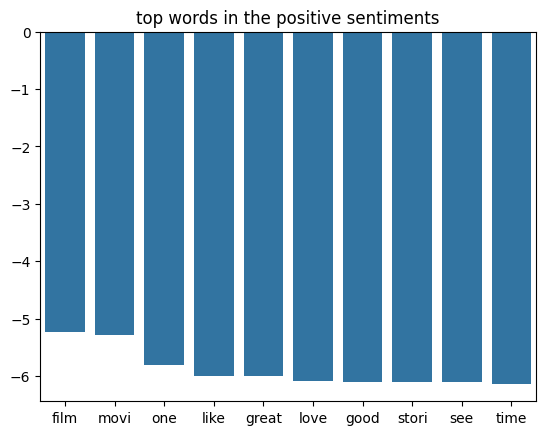

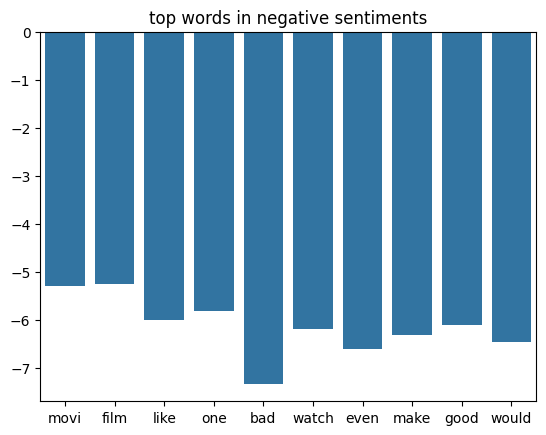

In [37]:
#top words per sentiments

#get features names from the vectorizer
feature_names = tfidf.get_feature_names_out()

#getting the log probabilites
class_labels = nb_model.classes_
log_prob = nb_model.feature_log_prob_

#top ten words for positive commments
top_pos_indices = log_prob[1].argsort()[-10:][::-1]
top_pos_words = [feature_names[i] for i in top_pos_indices]
top_pos_probs = log_prob[1][top_pos_indices]

#top ten words in the negative sentiments
top_neg_indices = log_prob[0].argsort()[-10:][::-1]
top_neg_words = [feature_names[i] for i in top_neg_indices]
top_neg_probs = log_prob[1][top_neg_indices]

#plot
plt.Figure(figsize=(12,5))
sns.barplot(x=top_pos_words, y=top_pos_probs)
plt.title("top words in the positive sentiments")
plt.show()

#plot the negative words
plt.Figure(figsize=(12,5))
sns.barplot(x=top_neg_words, y=top_neg_probs)
plt.title("top words in negative sentiments")
plt.show()



